In [1]:
import sys, os
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.dataset_utils.kitti_dataset_utils.kitti_dataset_summary import obj_box_summary, aggregated_bboxes, sort_according_to_box_criteria
from modules.plot.plot_dataanalysis import (
    plot_intervals, 
    plot_partitioned_bbox_data, 
    plot_remapped_bbox_width_and_heights_kitti,
    plot_bbox_area_and_aspect_ratio_histogram
)

In [2]:
gt_labels_train, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_train_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

gt_labels_val, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_val_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

bbox_summary = obj_box_summary(gt_labels_train)
boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all = aggregated_bboxes(bbox_summary)
for key in list(bbox_summary.keys()):
    print(key)

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0008
Sequence: 0009
Sequence: 0011
Sequence: 0012
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0019
Sequence: 0020
Loading JSON file .. please wait
Sequence: 0007
Sequence: 0010
Sequence: 0013
Sequence: 0014
Sequence: 0018
obj_category_bboxes
obj_category_bboxes_h
obj_category_bboxes_w
obj_category_bboxes_area
obj_category_bboxes_aspect_ratio
image_paths
obj_class


In [3]:
boxes_sorted, \
obj_class_sorted, \
box_area_sorted, \
box_aspect_ratio_sorted, \
image_names_sorted \
    = sort_according_to_box_criteria(
            boxes_all, obj_class_all, box_area_all, \
            box_aspect_ratio_all, image_paths_all, \
            sorting_criteria='box_area', order='ascending')

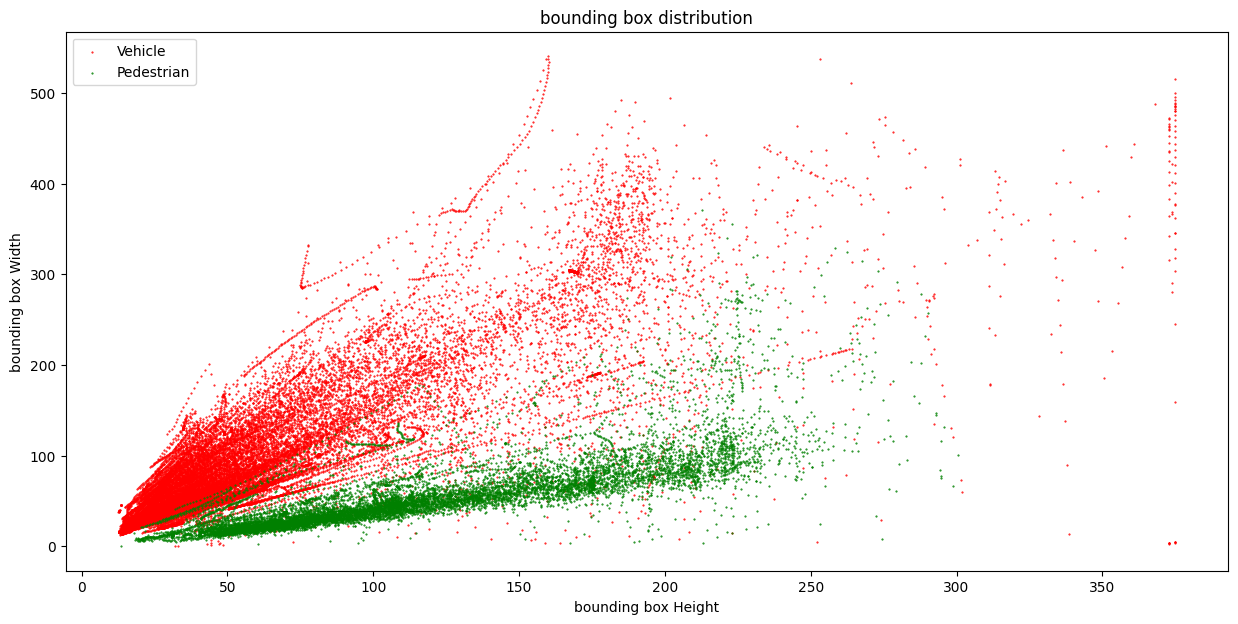

In [4]:
plot_remapped_bbox_width_and_heights_kitti("bounding box distribution", bbox_summary, figsize=(15, 7))

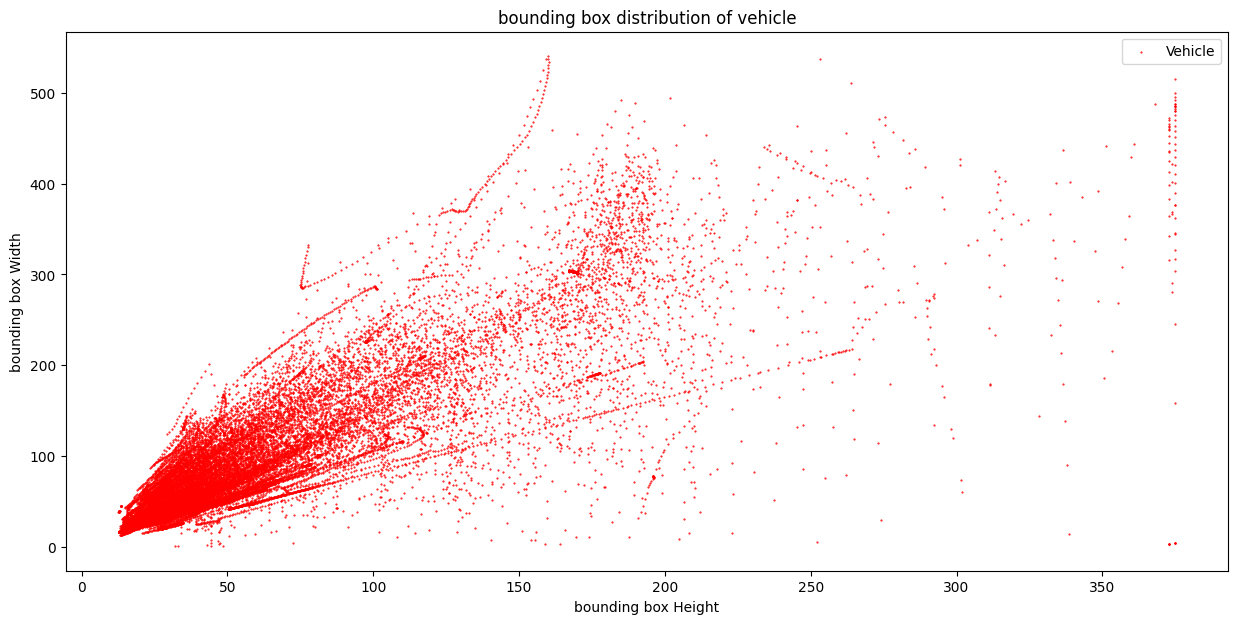

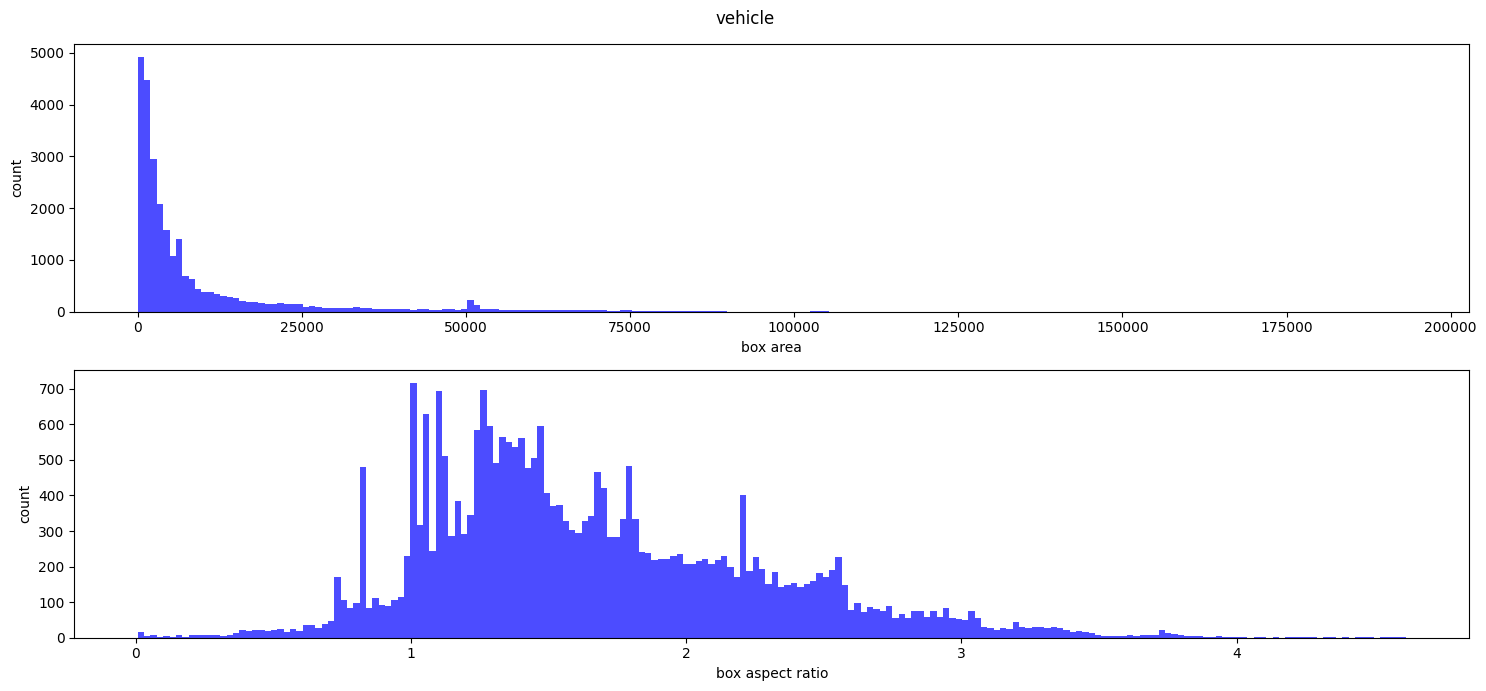

In [5]:
plot_remapped_bbox_width_and_heights_kitti(
    "bounding box distribution of vehicle",
    bbox_summary,
    figsize=(15, 7),
    plot_veh = True,
    plot_ped = False)

plot_bbox_area_and_aspect_ratio_histogram(bbox_summary, 200, 'vehicle', (15, 7))

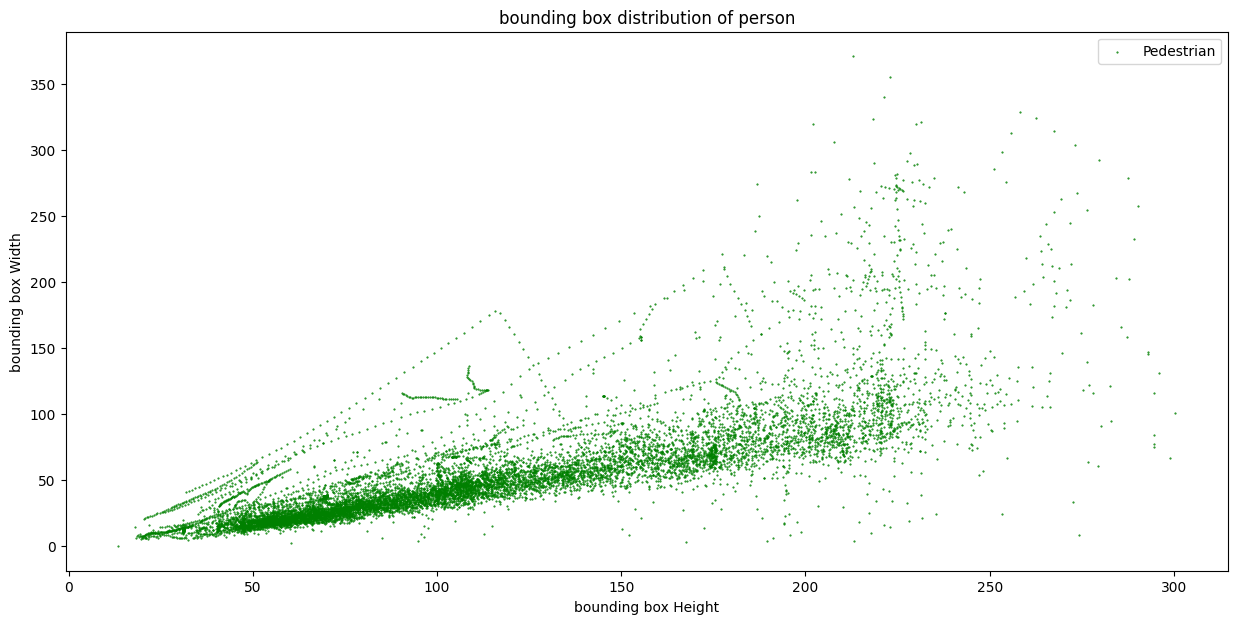

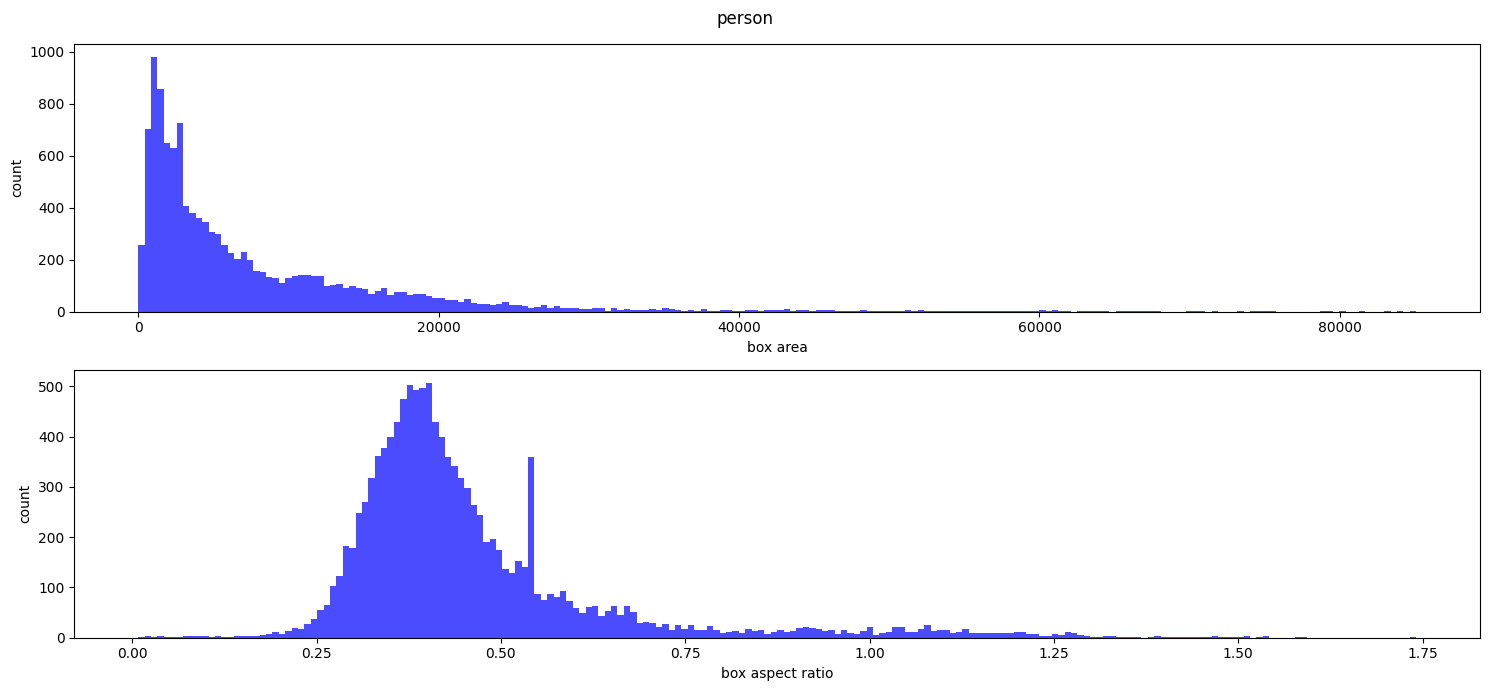

In [6]:
plot_remapped_bbox_width_and_heights_kitti(
    "bounding box distribution of person",
    bbox_summary,
    figsize=(15, 7),
    plot_veh = False,
    plot_ped = True)

plot_bbox_area_and_aspect_ratio_histogram(bbox_summary, 200, 'person', (15, 7))